<a href="https://colab.research.google.com/github/AnushkaChanda/ML_algorithms/blob/main/Wine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Handling class imbalance

In [ ]:
import shap
import pickle

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

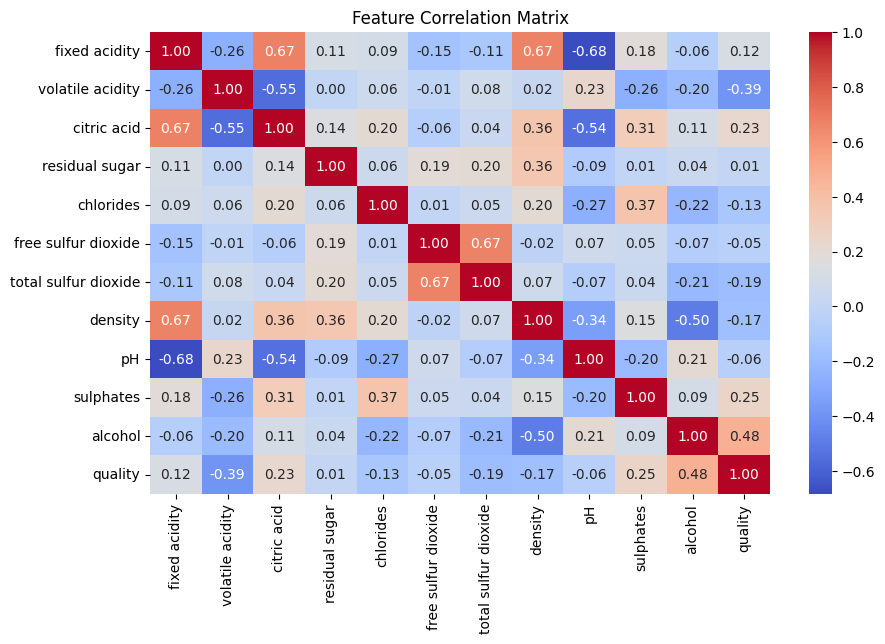

In [ ]:
# Visualizing Correlation Matrix
plt.figure(figsize=(10,6)) ##10 inches wide, 6 inches tall
##df.corr(): Computes the Pearson correlation coefficients between all numerical columns in the dataset.
#sns.heatmap(...): Uses Seaborn to create a heatmap.
#annot=True: Displays correlation values inside the heatmap cells.
#cmap='coolwarm': Uses a red-blue colormap to highlight strong positive (red) and negative (blue) correlations.
#fmt='.2f': Formats the correlation values to 2 decimal places.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
 #Feature Engineering - Convert to Classification Problem
#Converting Wine Quality into a Binary Classification Problem
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)  # Good (1) or Not (0)
df.drop(columns=['quality'], inplace=True)

In [ ]:
# Splitting Data
X = df.drop(columns=['quality_label'])
y = df['quality_label']

# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]
}
#n_estimators: The number of decision trees in the Random Forest. More trees typically improve performance but increase training time.
#max_depth: Controls how deep each tree in the forest can be. A deeper tree captures more patterns but can overfit.
#min_samples_split: Minimum number of samples required to split an internal node. Higher values help prevent overfitting.
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
rf_model.fit(X_train, y_train)

print(f"Best Parameters: {rf_model.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score

best_model = rf_model.best_estimator_
#best_model.predict(X_test): Uses the trained model to predict the wine quality labels (0 or 1) for the test dataset.
y_pred = best_model.predict(X_test)

# Display best hyperparameters
print(f"Best Parameters: {rf_model.best_params_}")

#accuracy_score(y_test, y_pred):
# Computes the proportion of correctly classified samples.
# Gives a general measure of how well the model is performing.
# classification_report(y_test, y_pred):
# Prints detailed metrics:
# Precision (How many of the predicted positives were actually positive?)
# Recall (How many actual positives were correctly identified?)
# F1-score (Balance between precision & recall)
# Support (Number of samples for each class)


# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9375
F1 Score: 0.7222
ROC-AUC Score: 0.7969

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.90      0.60      0.72        43

    accuracy                           0.94       320
   macro avg       0.92      0.80      0.84       320
weighted avg       0.94      0.94      0.93       320

Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.90      0.60      0.72        43

    accuracy                           0.94       320
   macro avg       0.92      0.80      0.84       320
weighted avg       0.94      0.94      0.93       320



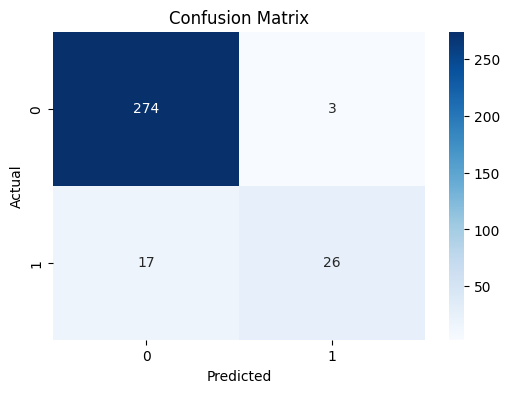

In [ ]:
# Confusion Matrix Visualization

# confusion_matrix(y_test, y_pred)

# Computes the confusion matrix, which shows the number of correct and incorrect predictions for each class.
# Rows represent the actual class labels.
# Columns represent the predicted class labels.
# sns.heatmap(..., annot=True, fmt='d', cmap='Blues')

# sns.heatmap(): Creates a heatmap visualization.
# annot=True: Displays the actual numerical values inside each cell.
# fmt='d': Ensures numbers are shown as integers instead of floating points.
# cmap='Blues': Uses a blue color gradient, making it visually clear.

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

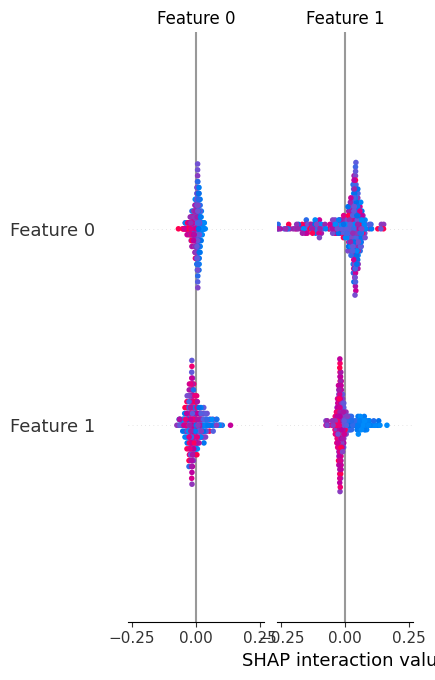

In [ ]:
#Explainability using SHAP

explainer = shap.TreeExplainer(best_model)
# explainer = shap.Explainer(best_model, X_train, check_additivity=False)
# Initializes a SHAP explainer for our trained Random Forest model (best_model).
# X_train is used to understand how the model makes decisions based on feature interactions.
# SHAP assigns each feature an importance value for each prediction.

shap_values = explainer(X_test)
# SHAP values measure how much each feature contributes to a specific prediction.
# explainer(X_test) computes SHAP values for all test samples.
# This helps identify key factors influencing the model’s decision for each wine sample.


shap.summary_plot(shap_values, X_test)

In [ ]:
#Save Model for Deployment

with open("wine_quality_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
# open("wine_quality_model.pkl", "wb") as f:
# Opens a new file named "wine_quality_model.pkl" in write-binary (wb) mode.
# "wb" ensures that the model is stored in a binary format, which is required for serialized objects like machine learning models.
# The file object (f) is used to write the model.
# pickle.dump(best_model, f):

# Serializes (converts into a byte stream) the trained model (best_model).
# Stores the serialized model inside the file (f).
# This allows the model to be saved and reloaded later without retraining.


print("Model Saved Successfully!")

Model Saved Successfully!
